### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
boston=load_boston()
boston_df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df['target']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Data Understanding

In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [5]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

### Model Building

In [6]:
X=boston_df.drop('target',axis=1)
y=boston_df['target']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((379, 13), (127, 13), (379,), (127,))

### Model Training

In [9]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

### Model Testing

In [10]:
y_pred_lr=linear_model.predict(X_test)

### Model Evaluation

In [11]:
mean_squared_error(y_test,y_pred_lr)

36.66928463549228

In [12]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
linear_model.coef_

array([-9.03452516e-02,  4.22023003e-02,  1.41498987e-02,  2.79135900e+00,
       -1.48536663e+01,  4.22503787e+00, -1.34104892e-02, -1.34585260e+00,
        2.50480936e-01, -1.07612606e-02, -9.42526235e-01,  1.18500386e-02,
       -4.59693844e-01])

In [14]:
Coeff_data = pd.DataFrame(data={'features':X_train.columns,'coeff':linear_model.coef_})
Coeff_data

,features,coeff
0,CRIM,-0.090345
1,ZN,0.042202
2,INDUS,0.014150
3,CHAS,2.791359
4,NOX,-14.853666
5,RM,4.225038
6,AGE,-0.013410
7,DIS,-1.345853
8,RAD,0.250481
9,TAX,-0.010761


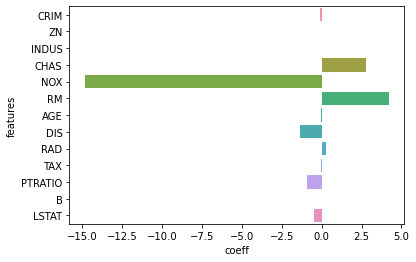

In [15]:
sns.barplot(x='coeff',y='features',data=Coeff_data)
plt.show()

### Ridge Regression

In [16]:
ridge_regressor=Ridge(alpha=1.0)

In [17]:
ridge_regressor.fit(X_train,y_train)

Ridge()

In [18]:
y_pred_ridge=ridge_regressor.predict(X_test)

In [19]:
mean_squared_error(y_test,y_pred_ridge)

37.29144439296869

In [20]:
ridge_regressor.coef_

array([-0.08797744,  0.04327326, -0.01550436,  2.66231068, -7.70470927,
        4.26340724, -0.01965855, -1.24553517,  0.22983532, -0.01117554,
       -0.86717479,  0.0120004 , -0.4665858 ])

In [21]:
ridge_coeff_data=pd.DataFrame(data={'features':X_train.columns,'coeff':ridge_regressor.coef_})
ridge_coeff_data

,features,coeff
0,CRIM,-0.087977
1,ZN,0.043273
2,INDUS,-0.015504
3,CHAS,2.662311
4,NOX,-7.704709
5,RM,4.263407
6,AGE,-0.019659
7,DIS,-1.245535
8,RAD,0.229835
9,TAX,-0.011176


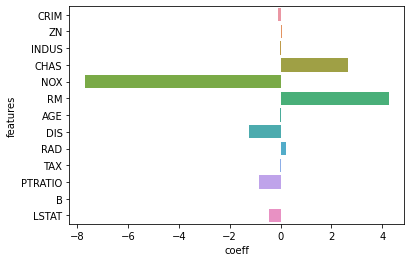

In [22]:
sns.barplot(x='coeff',y='features',data=ridge_coeff_data)
plt.show()

### Lasso Regression

In [23]:
lasso_regressor=Lasso(alpha=1.0)

In [24]:
lasso_regressor.fit(X_train,y_train)

Lasso()

In [25]:
y_pred_lasso=lasso_regressor.predict(X_test)

In [26]:
mean_squared_error(y_test,y_pred_lasso)

41.989899656601935

In [27]:
lasso_regressor.coef_

array([-0.05690995,  0.04795185, -0.        ,  0.        , -0.        ,
        0.88645953,  0.01279075, -0.70134738,  0.2131137 , -0.01273588,
       -0.73756047,  0.01034842, -0.74046573])

In [28]:
lasso_coeff_data=pd.DataFrame(data={'features':X_train.columns,'coeff':lasso_regressor.coef_})
lasso_coeff_data

,features,coeff
0,CRIM,-0.056910
1,ZN,0.047952
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.886460
6,AGE,0.012791
7,DIS,-0.701347
8,RAD,0.213114
9,TAX,-0.012736


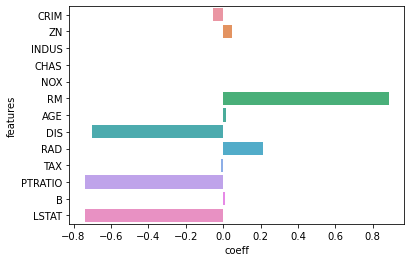

In [29]:
sns.barplot(x='coeff',y='features',data=lasso_coeff_data)
plt.show()

### Elastic Net Regression

In [30]:
elastic_net_regressor=ElasticNet(alpha=0.4,l1_ratio=0.5)

In [31]:
elastic_net_regressor.fit(X_train,y_train)

ElasticNet(alpha=0.4)

In [32]:
y_pred_elastic_net=elastic_net_regressor.predict(X_test)

In [33]:
mean_squared_error(y_test,y_pred_elastic_net)

39.164997492545076

In [34]:
elastic_net_regressor.coef_

array([-8.31140804e-02,  5.26344303e-02, -3.69713188e-02,  0.00000000e+00,
       -0.00000000e+00,  2.01380657e+00, -9.34231102e-04, -1.03075386e+00,
        2.60366355e-01, -1.39702983e-02, -8.32767495e-01,  1.12274645e-02,
       -6.53217861e-01])

In [35]:
elastic_net_coeff_data=pd.DataFrame(data={'features':X_train.columns,'coeff':elastic_net_regressor.coef_})
elastic_net_coeff_data

,features,coeff
0,CRIM,-0.083114
1,ZN,0.052634
2,INDUS,-0.036971
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.013807
6,AGE,-0.000934
7,DIS,-1.030754
8,RAD,0.260366
9,TAX,-0.013970


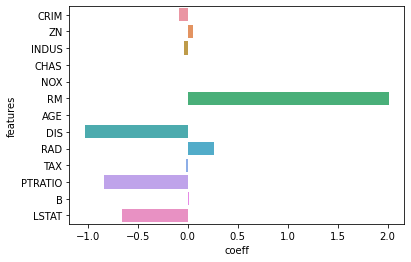

In [36]:
sns.barplot(x='coeff',y='features',data=elastic_net_coeff_data)
plt.show()

### End